In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
# import io
view_data = pd.read_csv('train.csv')
# view_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
view_data.shape

(38932, 5)

In [ ]:
view_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
view_data.tail()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy
38931,id49257,The Westin is a wonderfully restored grande da...,Mozilla,Desktop,happy


In [ ]:
view_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


EDA or DATA CLEANING

In [ ]:
count = view_data.isnull().sum().sort_values(ascending=False)
percentage = ((view_data.isnull().sum()/len(view_data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


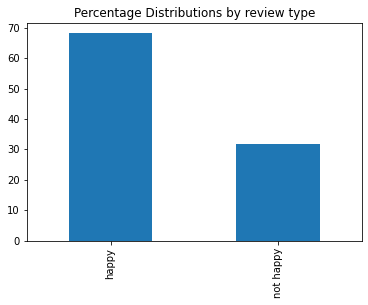

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(view_data.Is_Response.value_counts(normalize=True)*100,2))
round(view_data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
view_data.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [ ]:
view_data.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [ ]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [ ]:
view_data['cleaned_Data'] = pd.DataFrame(view_data.Description.apply(cleaned1))
view_data.head()

,Description,Is_Response,cleaned_Data
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [ ]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
view_data['cleaned_Data_new'] = pd.DataFrame(view_data['cleaned_Data'].apply(cleaned2))
view_data.head()

,Description,Is_Response,cleaned_Data,cleaned_Data_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = view_data.cleaned_Data_new
Dependent_var = view_data.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2418,  305],
       [ 153, 1018]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


In [ ]:
example = ["I'm tired"]
result = model.predict(example)

print(result)

['not happy']


In [ ]:
example = ["food was not good as we expected"]
result = model.predict(example)

print(result)

['not happy']


In [ ]:
example = ["food was good as we expected"]
result = model.predict(example)

print(result)

['happy']
